#### About dataset:
This dataset consists of 21 columns describing phones features and 2000 records.

**Columns descriptions:**
- *battery_power* - total energy a battery can store in one time measured in mAh
- *blue* - has bluetooth or not
- *clock_speed* - speed at which microprocessor executes instructions
- *dual_sim* - has dual sim support or not
- *fc* - front camera mega pixels
- *four_g* - has 4G or not
- *int_memory* - internal memory in gigabytes
- *m_dep* - mobile depth in cm
- *mobile_wt* - weight of mobile phone
- *n_cores* - number of cores of processor
- *pc* - primary camera mega pixels
- *px_height* - pixel resolution height
- *px_width* - pixel resolution width
- *ram* - Random Access Memory in megabytes
- *sc_h* - screen height of mobile in cm
- *sc_w*- screen width of mobile in cm
- *talk_time* - longest time that a single battery charge will last when you are talking
- *three_g* - has 3G or not
- *touch_screen* - has touch screen or not
- *wifi* - has wifi or not
- *price_range* - price range measured on a scale of 0 to 3

In [2]:
import pandas as pd
import numpy as np
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
np.random.seed(23)

In [7]:
# loading data
mobile_df = pd.read_csv('../Data/mobile.csv')

# splitting the data into test set and training set

# let's see how our dataset looks
mobile_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
mobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [73]:
# worth noticing that if phone has 4G automatically that means that it has 3G (there is no record where four_g = 1 and three_g = 0 )
records_with_both = mobile_df[(mobile_df['four_g'] == 1) & (mobile_df['three_g'] == 0)]
print("Number of records where four_g = 1 i three_g = 0:", len(records_with_both))

Number of records where four_g = 1 i three_g = 0: 0


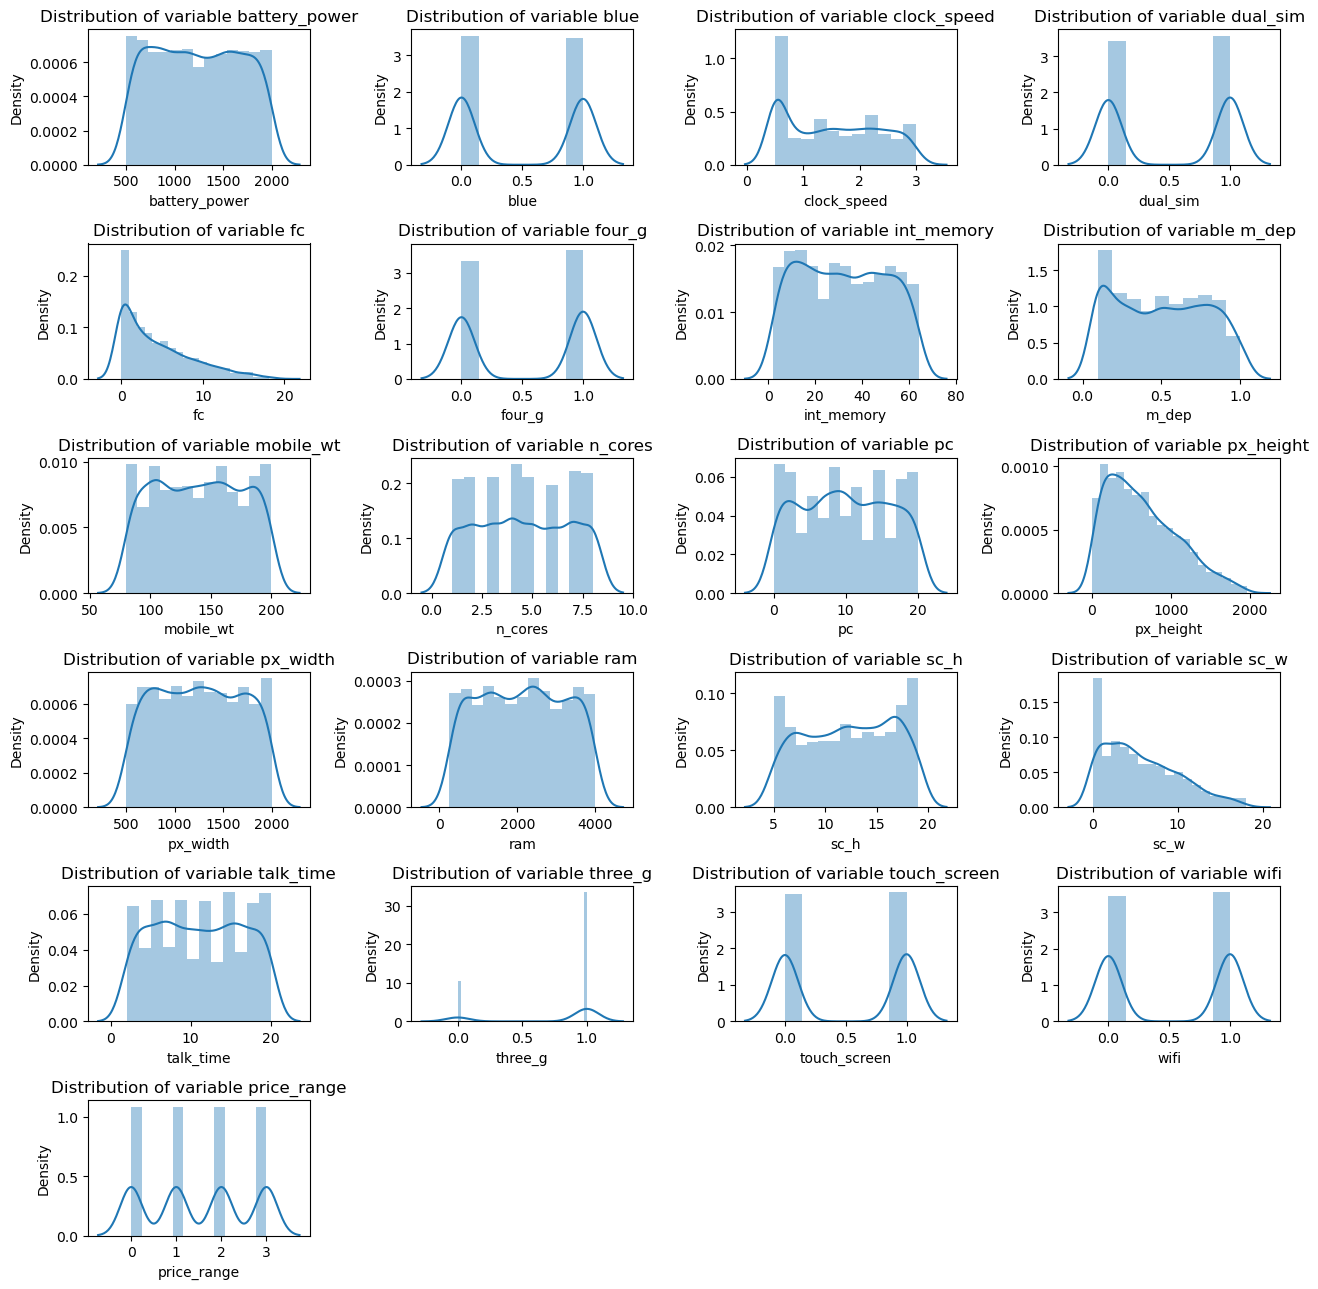

In [27]:
# Ustawienie liczby wierszy i kolumn w siatce subplotów
r = 6
c = 4

plt.figure(figsize=(13, 13))

# Iteracja przez kolumny ramki danych
for i, column in enumerate(mobile_df.columns):
    plt.subplot(r, c, i+1)
    dis_dist = sns.distplot(mobile_df[column])
    dis_dist.set_title(f'Distribution of variable {column}')  

plt.tight_layout() 
plt.show()

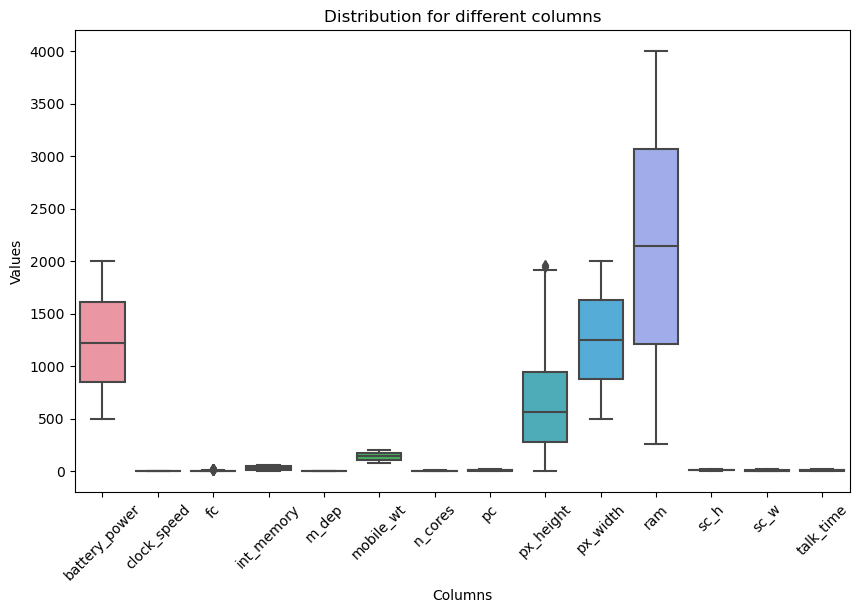

In [109]:
columns_binary = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi', 'price_range']
all_columns = mobile_df.columns

selected_columns = [col for col in all_columns if col not in columns_binary]

non_binary_df = mobile_df[selected_columns]

plt.figure(figsize=(10, 6))
sns.boxplot(data=non_binary_df, orient='v')
plt.title('Distribution for different columns')
plt.ylabel('Values')
plt.xlabel('Columns')
plt.xticks(rotation=45)
plt.show()


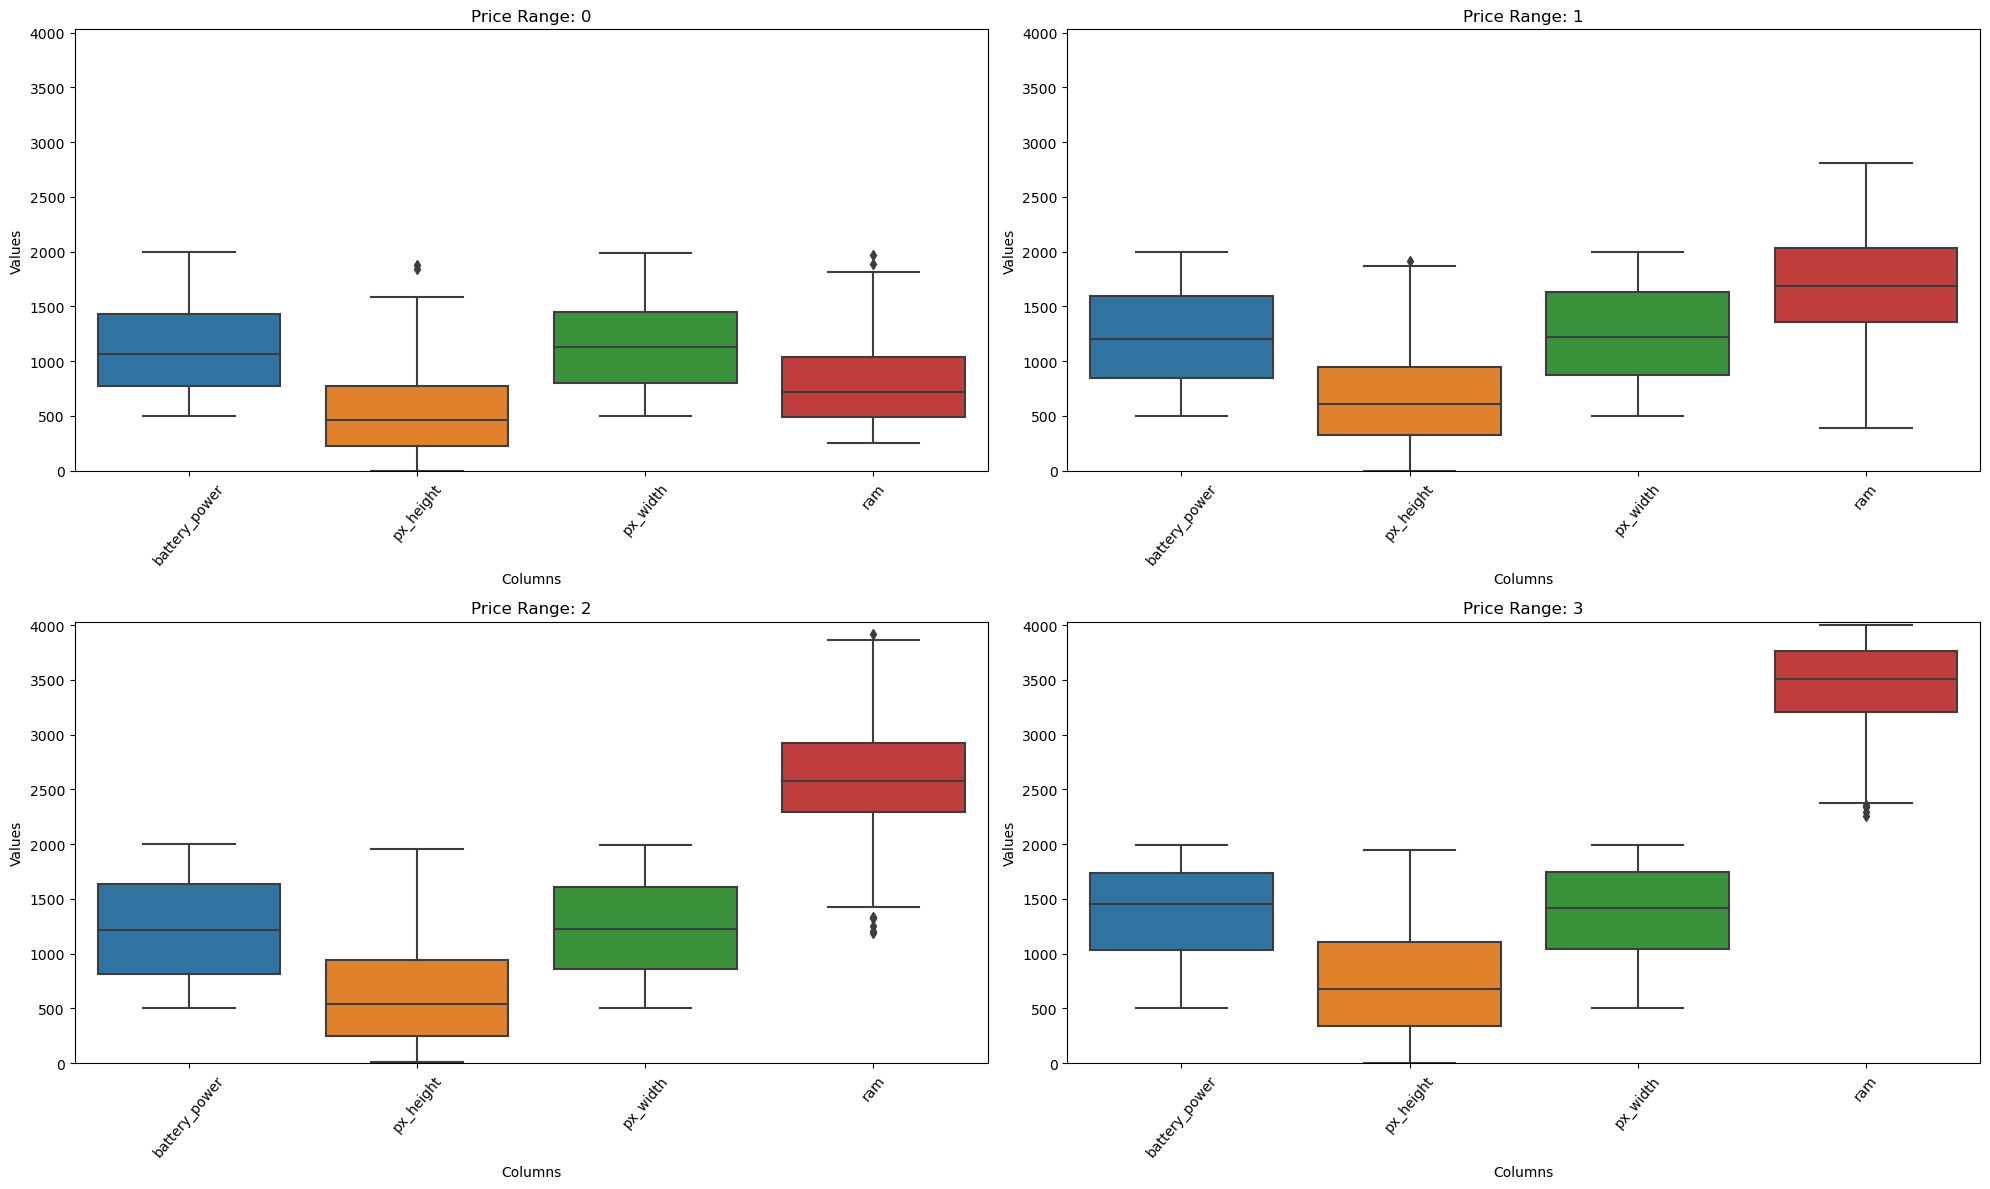

In [149]:
price_ranges = [0, 1, 2, 3]
excluded_columns = [col for col in mobile_df.columns if mobile_df[col].max() <= 200 and col != 'price_range']
filtered_big = mobile_df[[col for col in mobile_df.columns if col not in excluded_columns]]

# Utwórz siatkę subplotów
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))

# Iteruj po wartościach 'price_range' i rysuj boxploty dla każdej kolumny
for i, price_range in enumerate(price_ranges):
    row = i // 2  # Wiersz w siatce subplotów
    col = i % 2   # Kolumna w siatce subplotów
    
    # Filtruj ramkę danych dla danej wartości 'price_range'
    filtered_df = filtered_big[filtered_big['price_range'] == price_range]
    filtered_df = filtered_df.drop(columns=['price_range'])
    
    # Narysuj boxploty dla każdej kolumny w ramce danych
    sns.boxplot(data=filtered_df, ax=axes[row, col])
    axes[row, col].set_title(f'Price Range: {price_range}')
    axes[row, col].set_ylabel('Values')
    axes[row, col].set_xlabel('Columns')
    axes[row, col].set_ylim(0, 4030)
    axes[row, col].tick_params(axis='x', rotation=50)

plt.tight_layout()
plt.show()


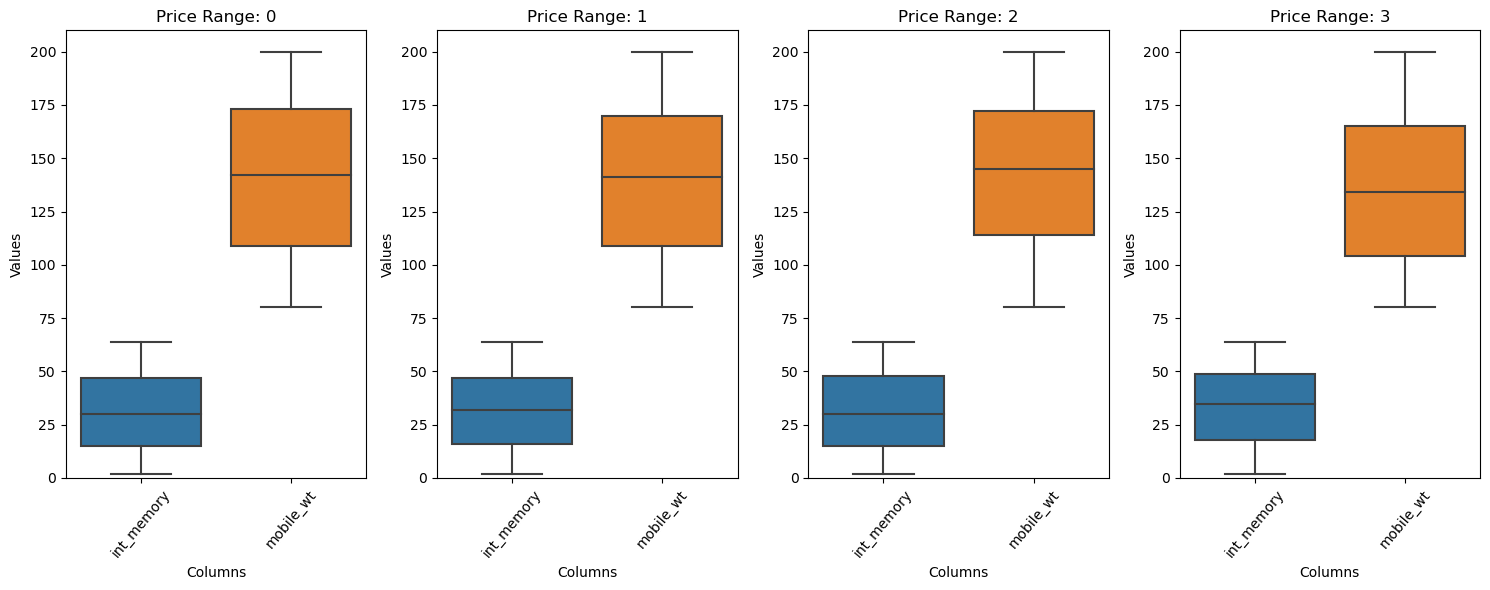

In [140]:
excluded_columns = [col for col in non_binary_df.columns if (non_binary_df[col].max() > 200) or (non_binary_df[col].max() < 50)]
filtered_big = mobile_df[[col for col in non_binary_df.columns if col not in excluded_columns]]

# Utwórz siatkę subplotów
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 6))

# Iteruj po wartościach 'price_range' i rysuj boxploty dla każdej kolumny
for i, price_range in enumerate(price_ranges):
    row = 0
    col = price_range
    
    # Filtruj ramkę danych dla danej wartości 'price_range'
    filtered_df = filtered_big[mobile_df['price_range'] == price_range]
    
    # Narysuj boxploty dla każdej kolumny w ramce danych
    sns.boxplot(data=filtered_df, ax=axes[col])
    axes[col].set_title(f'Price Range: {price_range}')
    axes[col].set_ylabel('Values')
    axes[col].set_xlabel('Columns')
    axes[col].set_ylim(0, 210)
    axes[col].tick_params(axis='x', rotation=50)

plt.tight_layout()
plt.show()


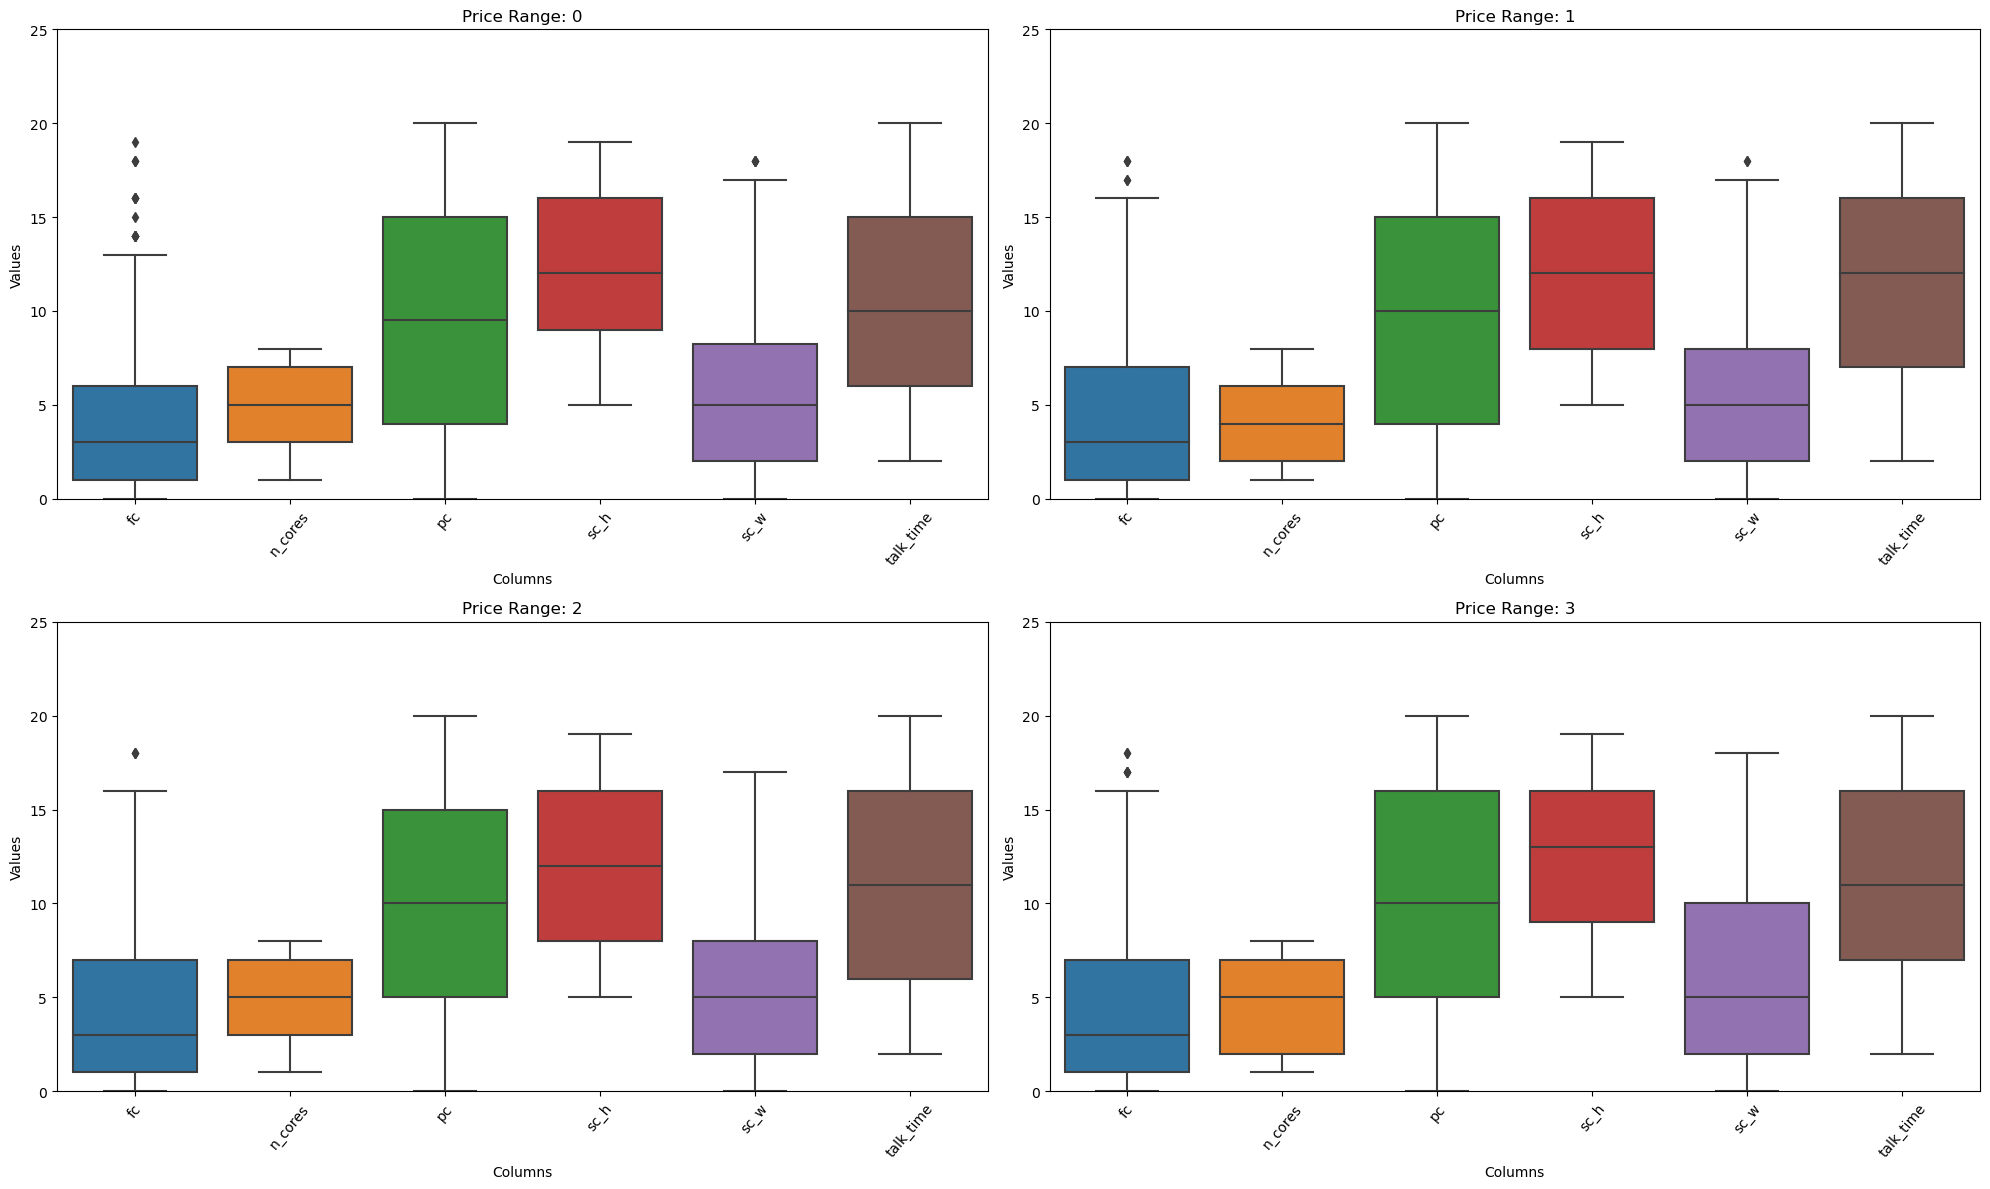

In [147]:
excluded_columns = [col for col in non_binary_df.columns if (non_binary_df[col].max() <= 5) or (non_binary_df[col].max() >= 50)]
filtered_big = mobile_df[[col for col in non_binary_df.columns if col not in excluded_columns]]

# Utwórz siatkę subplotów
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))

# Iteruj po wartościach 'price_range' i rysuj boxploty dla każdej kolumny
for i, price_range in enumerate(price_ranges):
    row = i // 2  # Wiersz w siatce subplotów
    col = i % 2   # Kolumna w siatce subplotów
    
    # Filtruj ramkę danych dla danej wartości 'price_range'
    filtered_df = filtered_big[mobile_df['price_range'] == price_range]
    
    # Narysuj boxploty dla każdej kolumny w ramce danych
    sns.boxplot(data=filtered_df, ax=axes[row, col])
    axes[row, col].set_title(f'Price Range: {price_range}')
    axes[row, col].set_ylabel('Values')
    axes[row, col].set_xlabel('Columns')
    axes[row, col].set_ylim(0, 25)
    axes[row, col].tick_params(axis='x', rotation=50)

plt.tight_layout()
plt.show()


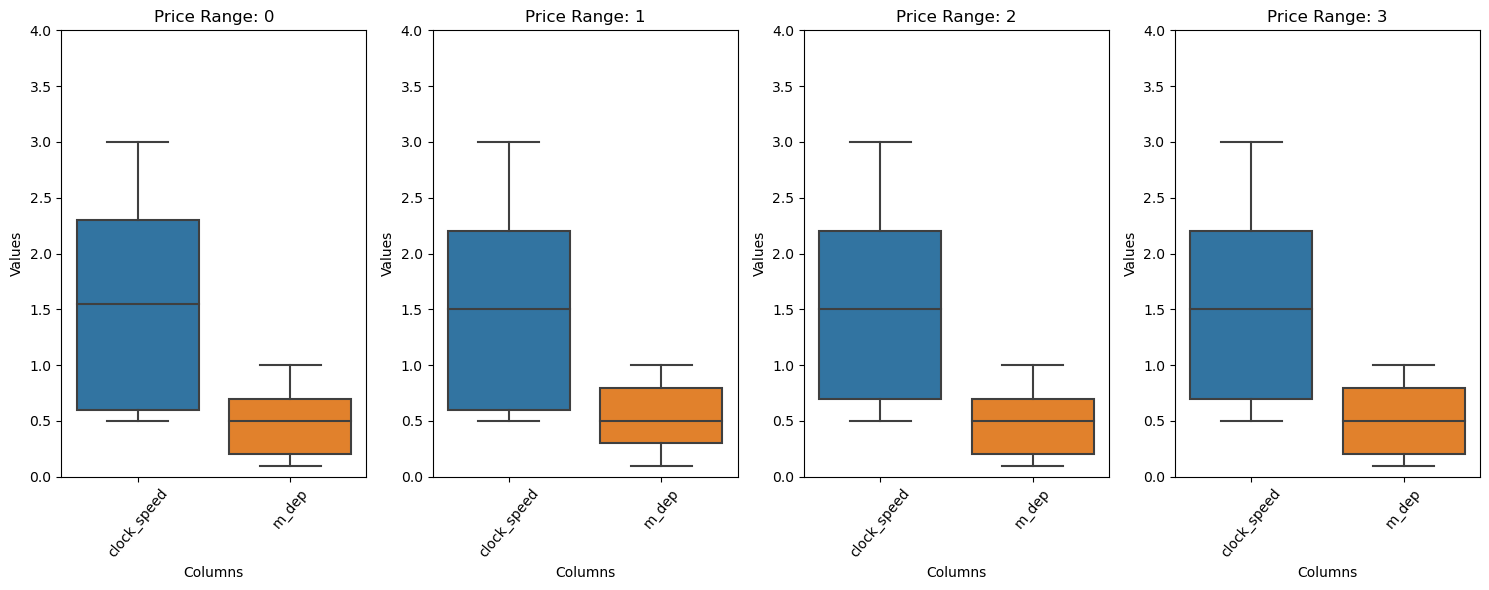

In [146]:
excluded_columns = [col for col in non_binary_df.columns if non_binary_df[col].max() > 5]
filtered_big = mobile_df[[col for col in non_binary_df.columns if col not in excluded_columns]]

# Utwórz siatkę subplotów
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 6))

# Iteruj po wartościach 'price_range' i rysuj boxploty dla każdej kolumny
for i, price_range in enumerate(price_ranges):
    row = 0
    col = price_range
    
    # Filtruj ramkę danych dla danej wartości 'price_range'
    filtered_df = filtered_big[mobile_df['price_range'] == price_range]
    
    # Narysuj boxploty dla każdej kolumny w ramce danych
    sns.boxplot(data=filtered_df, ax=axes[col])
    axes[col].set_title(f'Price Range: {price_range}')
    axes[col].set_ylabel('Values')
    axes[col].set_xlabel('Columns')
    axes[col].set_ylim(0, 4)
    axes[col].tick_params(axis='x', rotation=50)

plt.tight_layout()
plt.show()



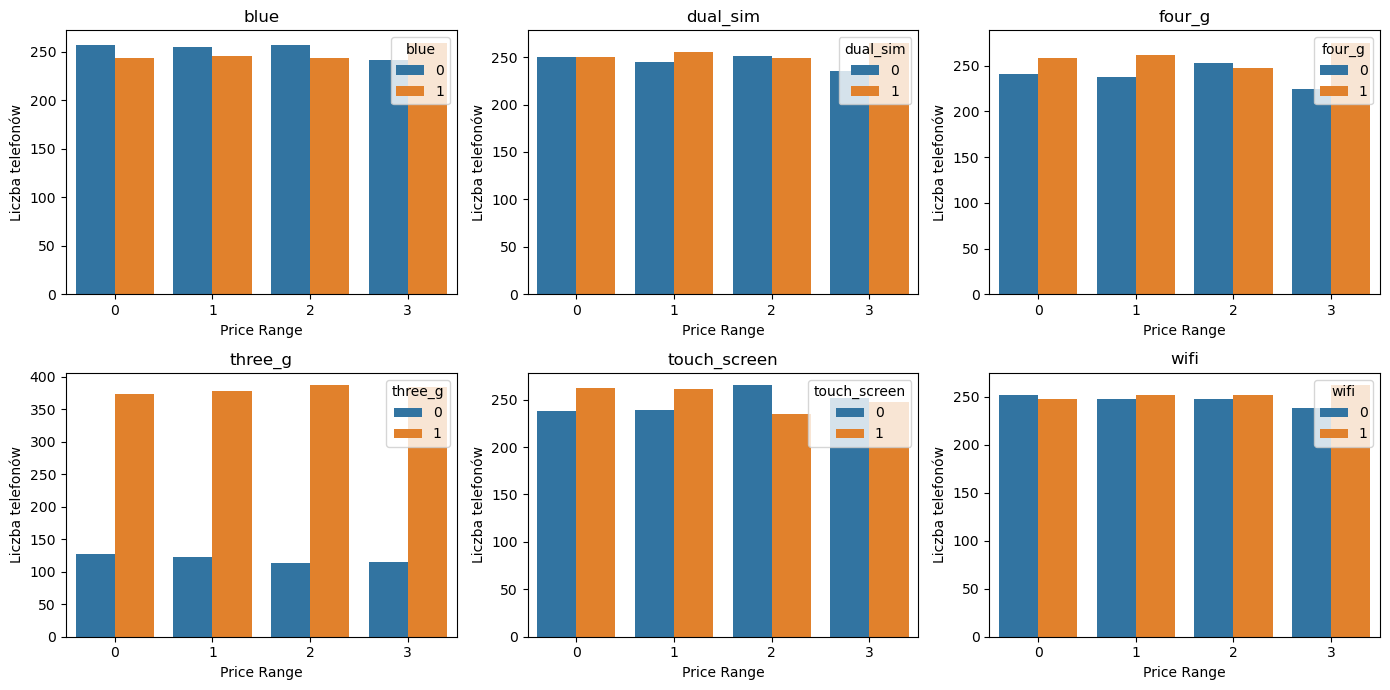

In [61]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 7))

for i in range(2):
    for j in range(3):
        column_index = i * 3 + j
        if column_index < len(columns_binary):
            column = columns_binary[column_index]
            sns.countplot(x='price_range', hue=column, data=mobile_df, ax=axes[i, j])
            axes[i, j].set_title(f'{column}')
            axes[i, j].set_xlabel('Price Range')
            axes[i, j].set_ylabel('Liczba telefonów')
        else:
            # Jeśli wykraczamy poza ilość dostępnych kolumn, ukryj niepotrzebne subploty
            axes[i, j].axis('off')

plt.tight_layout()
plt.show()

Features that migt affect the price range of the phone:
- *ram*
- *battery_power*
- *sc_h* / *sc_w* - they go kind of together i guess
- *pc* ????
- *pix_width* ????
- *talk_time* ????